# MWPM Decoding using PyMatching

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import stim, pymatching as pm
import numpy as np

# 生成含噪表面码电路
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    distance=5,
    rounds=5,
    after_clifford_depolarization=0.005
)

# 提取图-like 错误模型
dem = circuit.detector_error_model(decompose_errors=True)
matching = pm.Matching.from_detector_error_model(dem)

# 采样 1000 组综合征
sampler = circuit.compile_detector_sampler()
syndrome, actual = sampler.sample(shots=1000, separate_observables=True)

# 解码并统计逻辑错误
pred = matching.decode_batch(syndrome)
errors = np.sum(np.any(pred != actual, axis=1))
print("Logical errors:", errors)   # 输出结果如 8

Logical errors: 5


In [9]:
qasm = circuit.without_noise().to_qasm(open_qasm_version=2, skip_dets_and_obs=True)

In [10]:
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";

qreg q[64];
creg rec[145];

reset q[1]; h q[1]; // decomposed RX
reset q[3]; h q[3]; // decomposed RX
reset q[5]; h q[5]; // decomposed RX
reset q[7]; h q[7]; // decomposed RX
reset q[9]; h q[9]; // decomposed RX
reset q[12]; h q[12]; // decomposed RX
reset q[14]; h q[14]; // decomposed RX
reset q[16]; h q[16]; // decomposed RX
reset q[18]; h q[18]; // decomposed RX
reset q[20]; h q[20]; // decomposed RX
reset q[23]; h q[23]; // decomposed RX
reset q[25]; h q[25]; // decomposed RX
reset q[27]; h q[27]; // decomposed RX
reset q[29]; h q[29]; // decomposed RX
reset q[31]; h q[31]; // decomposed RX
reset q[34]; h q[34]; // decomposed RX
reset q[36]; h q[36]; // decomposed RX
reset q[38]; h q[38]; // decomposed RX
reset q[40]; h q[40]; // decomposed RX
reset q[42]; h q[42]; // decomposed RX
reset q[45]; h q[45]; // decomposed RX
reset q[47]; h q[47]; // decomposed RX
reset q[49]; h q[49]; // decomposed RX
reset q[51]; h q[51]; // decomposed RX
reset q[5

In [10]:
dem

stim.DetectorErrorModel('''
    error(0.00133512) D0 D3
    error(0.00796182) D0 D12
    error(0.00133512) D0 L0
    error(0.00266667) D1 D3
    error(0.00266667) D1 D3 ^ D14
    error(0.00133512) D1 D4
    error(0.000668004) D1 D12
    error(0.000668004) D1 D12 ^ D14
    error(0.00100167) D1 D15
    error(0.00100167) D1 D15 ^ D14
    error(0.000334114) D1 D15 ^ D14 ^ D19
    error(0.000334114) D1 D15 ^ D19
    error(0.00829061) D1 D20
    error(0.000334114) D1 D20 ^ D14
    error(0.000334114) D1 D20 ^ D14 ^ D19
    error(0.000334114) D1 D20 ^ D19
    error(0.00432611) D1 L0
    error(0.000334114) D1 L0 ^ D12 L0
    error(0.000334114) D1 L0 ^ D12 L0 ^ D14
    error(0.000334114) D1 L0 ^ D12 L0 ^ D14 ^ D19
    error(0.000334114) D1 L0 ^ D12 L0 ^ D19
    error(0.000334114) D1 L0 ^ D14
    error(0.000334114) D1 L0 ^ D14 ^ D19
    error(0.002999) D1 L0 ^ D19
    error(0.00266667) D2 D4
    error(0.00266667) D2 D4 ^ D24
    error(0.00133512) D2 D5
    error(0.000668004) D2 D20
    error(0.00

In [11]:
matching

<pymatching.Matching object with 120 detectors, 0 boundary nodes, and 502 edges>

<Axes: >

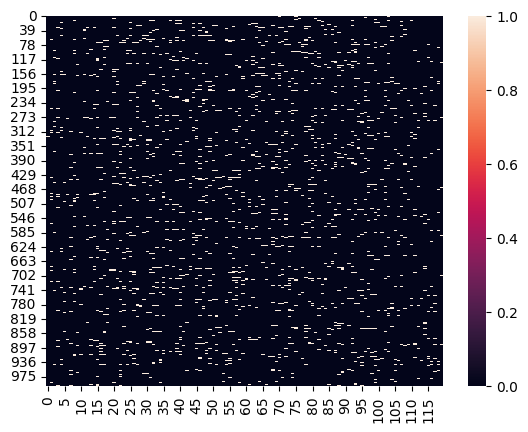

In [14]:
sns.heatmap(syndrome)

In [15]:
actual.shape, pred.shape, actual.shape

((1000, 1), (1000, 1), (1000, 1))

In [2]:
circuit

stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(6, 0) 6
    QUBIT_COORDS(7, 1) 7
    QUBIT_COORDS(9, 1) 9
    QUBIT_COORDS(1, 3) 12
    QUBIT_COORDS(2, 2) 13
    QUBIT_COORDS(3, 3) 14
    QUBIT_COORDS(4, 2) 15
    QUBIT_COORDS(5, 3) 16
    QUBIT_COORDS(6, 2) 17
    QUBIT_COORDS(7, 3) 18
    QUBIT_COORDS(8, 2) 19
    QUBIT_COORDS(9, 3) 20
    QUBIT_COORDS(10, 2) 21
    QUBIT_COORDS(0, 4) 22
    QUBIT_COORDS(1, 5) 23
    QUBIT_COORDS(2, 4) 24
    QUBIT_COORDS(3, 5) 25
    QUBIT_COORDS(4, 4) 26
    QUBIT_COORDS(5, 5) 27
    QUBIT_COORDS(6, 4) 28
    QUBIT_COORDS(7, 5) 29
    QUBIT_COORDS(8, 4) 30
    QUBIT_COORDS(9, 5) 31
    QUBIT_COORDS(1, 7) 34
    QUBIT_COORDS(2, 6) 35
    QUBIT_COORDS(3, 7) 36
    QUBIT_COORDS(4, 6) 37
    QUBIT_COORDS(5, 7) 38
    QUBIT_COORDS(6, 6) 39
    QUBIT_COORDS(7, 7) 40
    QUBIT_COORDS(8, 6) 41
    QUBIT_COORDS(9, 7) 42
    QUBIT_COORDS(10, 6) 43
    QUBIT_COORDS(0, 8) 44
